# Assignment 3: Comparison of ensemble approaches

In [ ]:
!pip install scikit-learn
!pip install umap-learn

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading (prerequisite: running the data download and preprocessing scripts)

In [ ]:
data_path = '.'
features = pd.read_csv(os.path.join(data_path, 'gtex_v8_features.csv'), index_col=0)
target = pd.read_csv(os.path.join(data_path, 'gtex_v8_target.csv'), index_col=0)
target = target.loc[features.columns,:]
print(features.shape, target.shape)
features.head()

(5000, 12385) (12385, 66)


<ipython-input-3-6eb3794f0761>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  target = pd.read_csv(os.path.join(data_path, 'gtex_v8_target.csv'), index_col=0)


,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2926-SM-5GZYI,GTEX-1117F-3226-SM-5N9CT,GTEX-111CU-0326-SM-5GZXO,GTEX-111CU-0626-SM-5EGHL,...,GTEX-ZZPU-0326-SM-5N9BJ,GTEX-ZZPU-0526-SM-5E44U,GTEX-ZZPU-0826-SM-5GZX5,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1026-SM-5E457,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000163714.17,36.45,24.190,53.80,46.19,16.04,26.44,29.230,14.310,30.91,29.86,...,24.61,28.68,27.900,11.900,24.61,14.21,27.43,38.64,17.210,33.63
ENSG00000152952.11,42.96,3.496,139.30,35.69,25.27,32.54,4.924,4.734,19.02,34.25,...,77.69,18.33,3.921,6.675,24.87,11.84,42.65,29.12,2.100,60.25
ENSG00000114698.14,121.70,7.914,71.05,111.70,30.23,72.03,20.530,8.585,33.56,21.93,...,53.95,40.22,14.670,7.684,43.53,22.97,32.08,64.24,5.248,99.28
ENSG00000188313.12,86.91,5.382,37.91,49.68,17.11,27.71,11.030,4.379,112.20,13.86,...,78.97,47.32,8.004,7.435,30.09,12.50,16.08,21.20,3.408,46.74
ENSG00000163754.17,64.99,714.500,126.00,84.01,34.54,30.83,17.640,21.270,67.58,174.50,...,45.82,56.12,12.440,62.190,34.08,59.98,160.40,113.50,156.900,32.89


In [ ]:
target.head()

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,...,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS,SUBJID,SEX,AGE,DTHHRDY
GTEX-1117F-0226-SM-5GZZ7,0.0,B1,"2 pieces, ~15% vessel stroma, rep delineated",6.8,Adipose Tissue,Adipose - Subcutaneous,0002190,1214.0,1125.0,BP-43693,...,50.0354,0.003105,0.994740,NaN,0.0,50.1944,GTEX-1117F,2,60-69,4.0
GTEX-1117F-0426-SM-5EGHI,0.0,B1,"2 pieces, !5% fibrous connective tissue, delin...",7.1,Muscle,Muscle - Skeletal,0011907,1220.0,1119.0,BP-43495,...,50.2809,0.006995,0.995041,NaN,0.0,49.9455,GTEX-1117F,2,60-69,4.0
GTEX-1117F-0526-SM-5EGHJ,0.0,B1,"2 pieces, clean, Monckebeg medial sclerosis, r...",8.0,Blood Vessel,Artery - Tibial,0007610,1221.0,1120.0,BP-43495,...,49.9535,0.002868,0.994001,NaN,0.0,50.2667,GTEX-1117F,2,60-69,4.0
GTEX-1117F-0626-SM-5N9CS,1.0,B1,"2 pieces, up to 4mm aderent fat/nerve/vessel, ...",6.9,Blood Vessel,Artery - Coronary,0001621,1243.0,1098.0,BP-43956,...,50.2096,0.005337,0.992257,NaN,0.0,50.0865,GTEX-1117F,2,60-69,4.0
GTEX-1117F-0726-SM-5GIEN,1.0,B1,"2 pieces, no abnormalities",6.3,Heart,Heart - Atrial Appendage,0006631,1244.0,1097.0,BP-44261,...,50.2367,0.030584,0.995711,NaN,0.0,49.9563,GTEX-1117F,2,60-69,4.0


In [ ]:
feature_to_symbol = pd.read_csv(os.path.join(data_path, 'gtex_v8_gene_id_to_symbol.csv'), index_col=0)
feature_to_symbol.head()

,Symbol
Name,
ENSG00000198938.2,MT-CO3
ENSG00000198899.2,MT-ATP6
ENSG00000198886.2,MT-ND4
ENSG00000198712.1,MT-CO2
ENSG00000198804.2,MT-CO1


In [ ]:
import numpy as np

# Subsample features and target for faster testing (comment out in the end for actual analysis)
# np.random.seed(42)
# sample_indices = np.random.choice(features.shape[1], 2000, replace=False)
# features_subsampled = features.iloc[:, sample_indices]
# target_subsampled = target.iloc[sample_indices, :]

# full dataset (still name it the same variable)
features_subsampled = features
target_subsampled = target

print(features_subsampled.shape, target_subsampled.shape)

(5000, 12385) (12385, 66)


## Data normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_transposed = features_subsampled.T
features_normalized = pd.DataFrame(
    scaler.fit_transform(features_transposed.values),
    index=features_transposed.index,
    columns=features_transposed.columns)
features_normalized = features_normalized.dropna(axis=1)
print(features_normalized.shape)
features_normalized.head()

(12385, 5000)


Name,ENSG00000163714.17,ENSG00000152952.11,ENSG00000114698.14,ENSG00000188313.12,ENSG00000163754.17,ENSG00000169908.11,ENSG00000018408.14,ENSG00000082996.19,ENSG00000070087.13,ENSG00000120742.10,...,ENSG00000163159.12,ENSG00000143398.19,ENSG00000159352.15,ENSG00000143393.16,ENSG00000143416.20,ENSG00000159377.10,ENSG00000143442.21,ENSG00000143436.10,ENSG00000197747.8,ENSG00000163191.5
GTEX-1117F-0226-SM-5GZZ7,0.688475,0.153562,2.580958,1.994486,-0.143558,0.336772,0.426066,1.097335,-0.322056,0.189181,...,0.485587,0.730697,0.474744,1.315586,-0.311079,2.199507,-0.239939,0.793382,1.347699,-0.198655
GTEX-1117F-0426-SM-5EGHI,-0.156460,-0.444758,-0.731244,-0.878079,6.831178,-0.447244,-0.732233,-0.653862,0.304165,-1.331742,...,0.201737,-0.976478,3.826114,-0.684238,-0.265833,0.712398,-1.031595,0.469781,-0.784660,-0.541371
GTEX-1117F-0526-SM-5EGHJ,1.884203,1.614188,1.106584,0.268016,0.511595,0.233277,0.198121,1.005286,0.295892,0.434047,...,1.416950,0.329972,1.726016,1.493908,-0.238735,0.863863,0.106910,1.024719,0.038690,-0.284667
GTEX-1117F-0626-SM-5N9CS,1.359737,0.043341,2.289867,0.682721,0.060687,0.870675,0.972387,0.548436,0.261030,1.209109,...,0.563000,0.380896,0.230465,1.588313,-0.027703,0.778664,1.537380,0.602552,0.676126,-0.010058
GTEX-1117F-0726-SM-5GIEN,-0.718141,-0.114639,-0.081647,-0.464854,-0.470544,0.135532,-0.274133,-0.732330,-0.650116,-0.899576,...,-1.195308,-0.954653,-1.000070,-0.975846,-0.434571,-1.271273,-0.502935,-1.226990,-0.381717,-0.416642


## 1. Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
import umap

Visualize PCA and UMAP with 2 componenets coloring by tissue

In [ ]:
data = features_normalized
labels = target_subsampled['SMTS']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['label'] = labels.values

umap_reducer = umap.UMAP(
    n_components=2,
    n_neighbors=15,
    learning_rate=1.0,
    random_state=42
    )
umap_result = umap_reducer.fit_transform(data)
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = labels.values

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


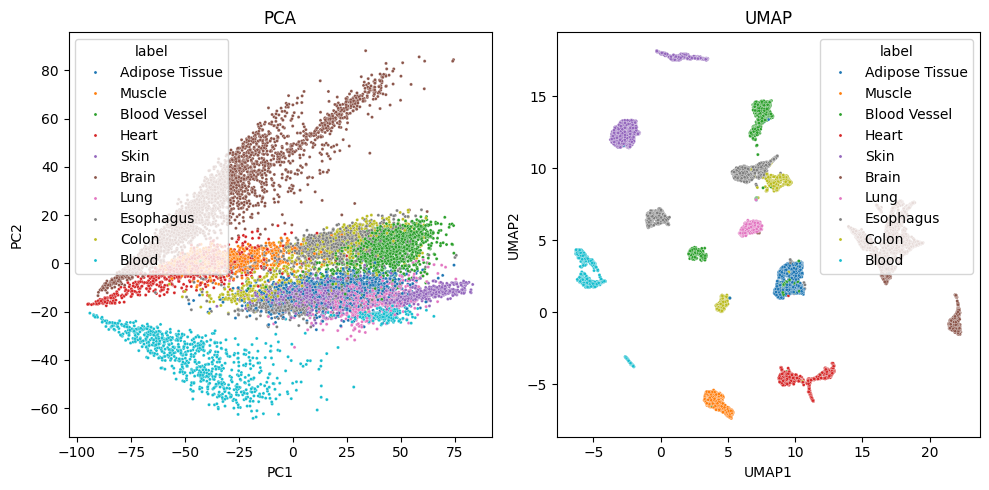

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, ax=axes[0], s=5)
axes[0].set_title('PCA')

sns.scatterplot(x='UMAP1', y='UMAP2', hue='label', data=umap_df, ax=axes[1], s=5)
axes[1].set_title('UMAP')

plt.tight_layout()
plt.show()

Use silhouette score to find the optimal 2D UMAP projection parameters that best distinguishes tissue type

In [ ]:
from sklearn.metrics import silhouette_score
n_neighbors = [10, 30, 50, 100]
learning_rate = [0.1, 0.5, 1.0]

umap_results = pd.DataFrame()
umaps = {}

for n_neighbor in n_neighbors:
  for lr in learning_rate:
    umap_reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbor,
        learning_rate=lr,
        random_state=42,
        n_jobs=1
        )

    umap_result = umap_reducer.fit_transform(data)
    umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['label'] = labels.values
    umaps[(n_neighbor, lr)] = umap_df

    # evaluate umap space with silhouette score
    silhouette_avg = silhouette_score(umap_df[['UMAP1', 'UMAP2']], umap_df['label'])
    umap_results = pd.concat([
        umap_results,
        pd.DataFrame({'n_neighbors': [n_neighbor], 'learning_rate': [lr], 'silhouette_score': [silhouette_avg]})], ignore_index=True)

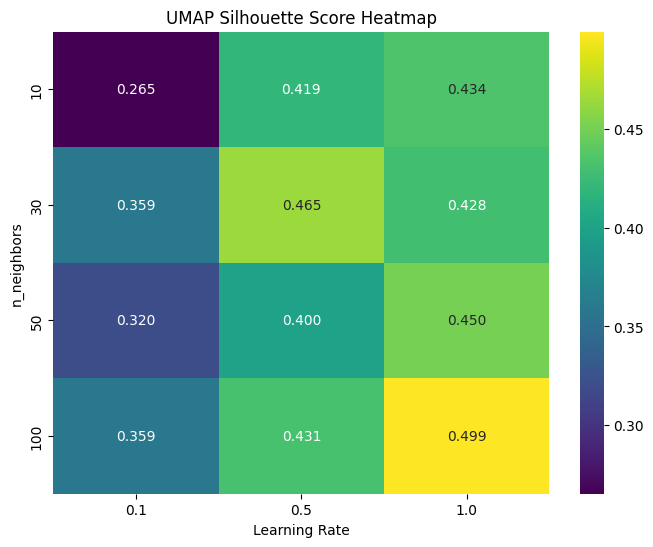

In [ ]:
heatmap_data = umap_results.pivot_table(
    index='n_neighbors',
    columns='learning_rate',
    values='silhouette_score',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".3f")
plt.title("UMAP Silhouette Score Heatmap")
plt.xlabel("Learning Rate")
plt.ylabel("n_neighbors")
plt.show()

Visualize optimal UMAP

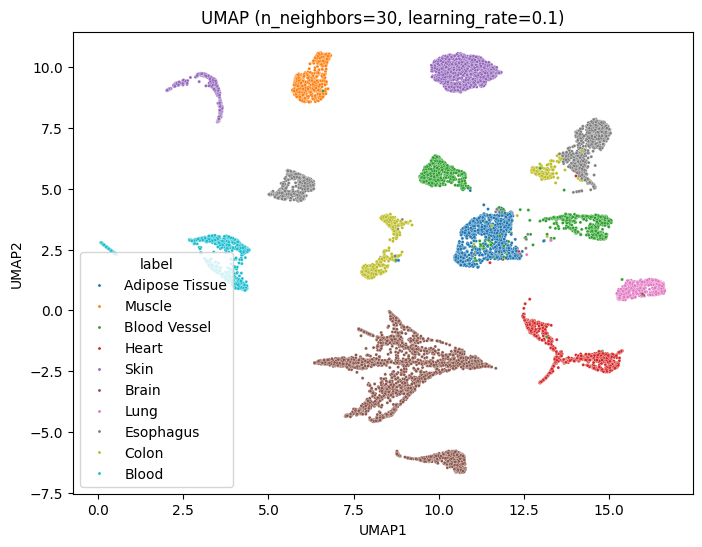

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='label', data=umaps[(30, 0.1)], s=5)
plt.title('UMAP (n_neighbors=30, learning_rate=0.1)')
plt.show()

## Ensembl Methods for tissue prediction

Using the top 2 components of PCA and the optimal UMAP with 2 components for fairness of comparison

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np

def random_forest_kfold_cv(
    X,
    y,
    n_estimator_range=[50, 100, 200],
    max_depth=[10, 20, 30],
    k=5,
    random_state=42):

  kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
  results = []

  for n_estimator in n_estimator_range:
    for depth in max_depth:
      rf_classifier = RandomForestClassifier(
          n_estimators=n_estimator,
          max_depth=depth,
          random_state=random_state
      )

      cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='balanced_accuracy')
      mean_accuracy = np.mean(cv_scores)
      std_accuracy = np.std(cv_scores)

      results.append({
          'n_estimator': n_estimator,
          'max_depth': depth,
          'mean_accuracy': mean_accuracy,
          'std_accuracy': std_accuracy
      })

  results_df = pd.DataFrame(results)

  return results_df

def hist_gradient_boosting_kfold_cv(
    X,
    y,
    learning_rate_range=[0.05, 0.1, 0.25],
    max_iter_range=[50, 100, 200],
    k=5,
    random_state=42):

  kf = KFold(n_splits=k, shuffle=True, random_state=random_state)

  results = []

  for learning_rate in learning_rate_range:
    for max_iter in max_iter_range:
      hgb_classifier = HistGradientBoostingClassifier(
          learning_rate=learning_rate,
          max_iter=max_iter,
          random_state=random_state
      )

      cv_scores = cross_val_score(hgb_classifier, X, y, cv=kf, scoring='balanced_accuracy')
      mean_accuracy = np.mean(cv_scores)
      std_accuracy = np.std(cv_scores)
      results.append({
          'max_iter': max_iter,
          'learning_rate': learning_rate,
          'mean_accuracy': mean_accuracy,
          'std_accuracy': std_accuracy
      })

      results_df = pd.DataFrame(results)

  return results_df

### Bagging with Random Forest

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values
y = target_subsampled['SMTS']

umap_rf_results = random_forest_kfold_cv(X, y, k=5)

In [ ]:
X = pca_result
y = target_subsampled['SMTS']

pca_rf_results = random_forest_kfold_cv(X, y, k=5)

<Axes: xlabel='max_depth', ylabel='n_estimator'>

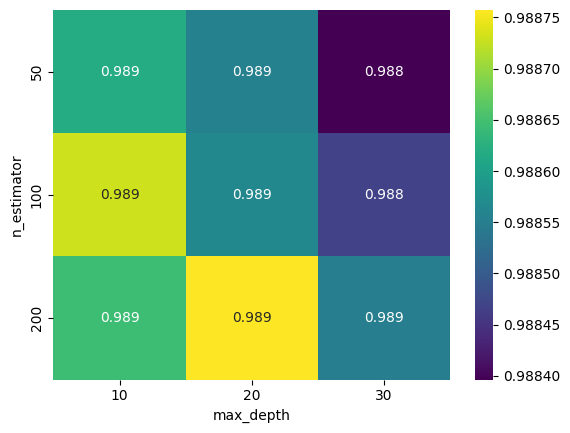

In [ ]:
sns.heatmap(
    umap_rf_results.pivot_table(
        index='n_estimator',
        columns='max_depth',
        values='mean_accuracy',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

<Axes: xlabel='max_depth', ylabel='n_estimator'>

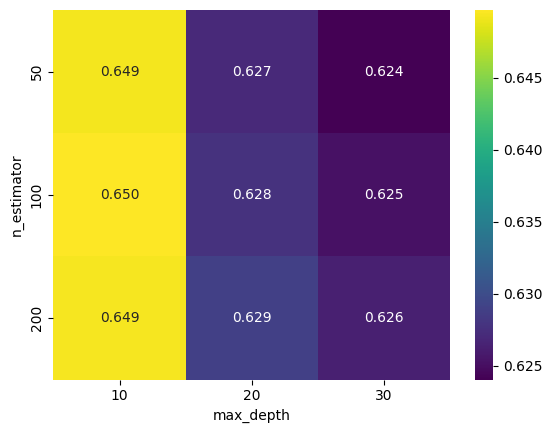

In [ ]:
sns.heatmap(
    pca_rf_results.pivot_table(
        index='n_estimator',
        columns='max_depth',
        values='mean_accuracy',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

### Boosting with Gradient Boosting

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values
y = target_subsampled['SMTS']

umap_gb_results = hist_gradient_boosting_kfold_cv(X, y, k=5)

In [ ]:
X = pca_result
y = target_subsampled['SMTS']

pca_gb_results = hist_gradient_boosting_kfold_cv(X, y, k=5)

<Axes: xlabel='learning_rate', ylabel='max_iter'>

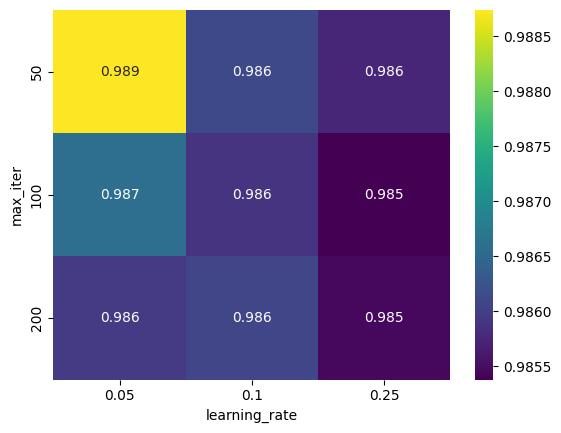

In [ ]:
sns.heatmap(
    umap_gb_results.pivot_table(
        index='max_iter',
        columns='learning_rate',
        values='mean_accuracy',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

<Axes: xlabel='learning_rate', ylabel='max_iter'>

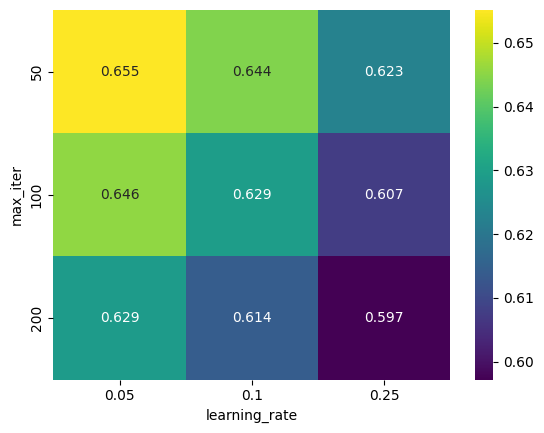

In [ ]:
sns.heatmap(
    pca_gb_results.pivot_table(
        index='max_iter',
        columns='learning_rate',
        values='mean_accuracy',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

### Classification result for optimal model parameters

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values
y = target_subsampled['SMTS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=50,
    max_depth=10,
    )
rf_classifier.fit(X_train, y_train.values.ravel())

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

print("Classification Report for Train Dataset:\n")
print(classification_report(y_train, y_train_pred, zero_division=0))
print("\nClassification Report for Test Dataset:\n")
print(classification_report(y_test, y_test_pred, zero_division=0))

Classification Report for Train Dataset:

                precision    recall  f1-score   support

Adipose Tissue       0.96      1.00      0.98       963
         Blood       1.00      1.00      1.00       743
  Blood Vessel       1.00      0.97      0.99      1068
         Brain       1.00      1.00      1.00      2114
         Colon       0.99      0.98      0.99       623
     Esophagus       0.99      0.99      0.99      1156
         Heart       1.00      0.99      1.00       689
          Lung       1.00      1.00      1.00       462
        Muscle       1.00      1.00      1.00       643
          Skin       1.00      1.00      1.00      1447

      accuracy                           0.99      9908
     macro avg       0.99      0.99      0.99      9908
  weighted avg       0.99      0.99      0.99      9908


Classification Report for Test Dataset:

                precision    recall  f1-score   support

Adipose Tissue       0.94      0.98      0.96       241
         Blood  

In [ ]:
gb_classifier = HistGradientBoostingClassifier(
    random_state=42,
    learning_rate=0.05,
    max_iter=50,
    )
gb_classifier.fit(X_train, y_train.values.ravel())

y_train_pred = gb_classifier.predict(X_train)
y_test_pred = gb_classifier.predict(X_test)

print("Classification Report for Train Dataset:\n")
print(classification_report(y_train, y_train_pred, zero_division=0))
print("\nClassification Report for Test Dataset:\n")
print(classification_report(y_test, y_test_pred, zero_division=0))

Classification Report for Train Dataset:

                precision    recall  f1-score   support

Adipose Tissue       0.96      0.99      0.98       963
         Blood       1.00      1.00      1.00       743
  Blood Vessel       1.00      0.97      0.98      1068
         Brain       1.00      1.00      1.00      2114
         Colon       0.99      0.98      0.99       623
     Esophagus       0.99      0.99      0.99      1156
         Heart       0.99      0.99      0.99       689
          Lung       0.99      1.00      0.99       462
        Muscle       1.00      1.00      1.00       643
          Skin       1.00      1.00      1.00      1447

      accuracy                           0.99      9908
     macro avg       0.99      0.99      0.99      9908
  weighted avg       0.99      0.99      0.99      9908


Classification Report for Test Dataset:

                precision    recall  f1-score   support

Adipose Tissue       0.94      0.98      0.96       241
         Blood  

## Ensemble-based models to predict age

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np

def random_forest_kfold_cv_regression(
    X,
    y,
    n_estimator_range=[50, 100, 200],
    max_depth=[10, 20, 30],
    k=5,
    random_state=42):

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    results = []

    for n_estimator in n_estimator_range:
        for depth in max_depth:
            rf_regressor = RandomForestRegressor(
                n_estimators=n_estimator,
                max_depth=depth,
                random_state=random_state
            )

            # MSE
            cv_scores = cross_val_score(rf_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
            mean_score = np.mean(cv_scores)
            std_score = np.std(cv_scores)

            results.append({
                'n_estimator': n_estimator,
                'max_depth': depth,
                'mean_mse': mean_score,
                'std_mse': std_score
            })

    results_df = pd.DataFrame(results)
    return results_df


def hist_gradient_boosting_kfold_cv_regression(
    X,
    y,
    learning_rate_range=[0.05, 0.1, 0.25],
    max_iter_range=[50, 100, 200],
    k=5,
    random_state=42):

    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    results = []

    for learning_rate in learning_rate_range:
        for max_iter in max_iter_range:
            hgb_regressor = HistGradientBoostingRegressor(
                learning_rate=learning_rate,
                max_iter=max_iter,
                random_state=random_state
            )

            # MSE
            cv_scores = cross_val_score(hgb_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
            mean_score = np.mean(cv_scores)
            std_score = np.std(cv_scores)

            results.append({
                'max_iter': max_iter,
                'learning_rate': learning_rate,
                'mean_mse': mean_score,
                'std_mse': std_score
            })

    results_df = pd.DataFrame(results)
    return results_df


### Random forest

In [ ]:
def bin_to_mean(bin_str, delim='-'):
    lower, upper = map(int, bin_str.split(delim))
    return (lower + upper) / 2

target_subsampled['AGE_CONT'] = target_subsampled['AGE'].apply(bin_to_mean)
target_subsampled.head()

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,...,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS,SUBJID,SEX,AGE,DTHHRDY,AGE_CONT
GTEX-1117F-0226-SM-5GZZ7,0.0,B1,"2 pieces, ~15% vessel stroma, rep delineated",6.8,Adipose Tissue,Adipose - Subcutaneous,0002190,1214.0,1125.0,BP-43693,...,0.003105,0.994740,NaN,0.0,50.1944,GTEX-1117F,2,60-69,4.0,64.5
GTEX-1117F-0426-SM-5EGHI,0.0,B1,"2 pieces, !5% fibrous connective tissue, delin...",7.1,Muscle,Muscle - Skeletal,0011907,1220.0,1119.0,BP-43495,...,0.006995,0.995041,NaN,0.0,49.9455,GTEX-1117F,2,60-69,4.0,64.5
GTEX-1117F-0526-SM-5EGHJ,0.0,B1,"2 pieces, clean, Monckebeg medial sclerosis, r...",8.0,Blood Vessel,Artery - Tibial,0007610,1221.0,1120.0,BP-43495,...,0.002868,0.994001,NaN,0.0,50.2667,GTEX-1117F,2,60-69,4.0,64.5
GTEX-1117F-0626-SM-5N9CS,1.0,B1,"2 pieces, up to 4mm aderent fat/nerve/vessel, ...",6.9,Blood Vessel,Artery - Coronary,0001621,1243.0,1098.0,BP-43956,...,0.005337,0.992257,NaN,0.0,50.0865,GTEX-1117F,2,60-69,4.0,64.5
GTEX-1117F-0726-SM-5GIEN,1.0,B1,"2 pieces, no abnormalities",6.3,Heart,Heart - Atrial Appendage,0006631,1244.0,1097.0,BP-44261,...,0.030584,0.995711,NaN,0.0,49.9563,GTEX-1117F,2,60-69,4.0,64.5


In [ ]:
blood_idx = np.where(target_subsampled['SMTS'] == 'Blood')[0]

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values[blood_idx,:]
y = target_subsampled['AGE_CONT'].values[blood_idx]

umap_rf_age_results = random_forest_kfold_cv_regression(X, y, k=5)

In [ ]:
X = pca_result[blood_idx,:]
y = target_subsampled['AGE_CONT'].values[blood_idx]

pca_rf_age_results = random_forest_kfold_cv_regression(X, y, k=5)

<Axes: xlabel='max_depth', ylabel='n_estimator'>

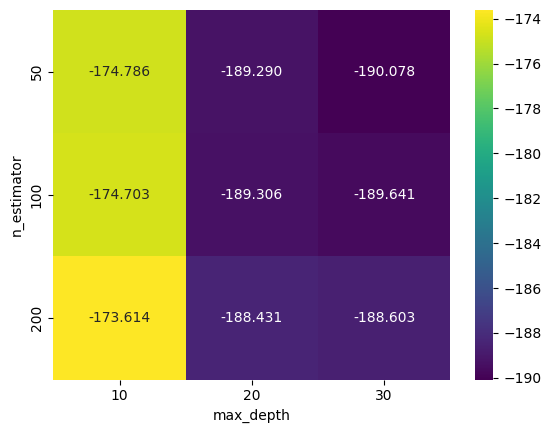

In [ ]:
sns.heatmap(
    umap_rf_age_results.pivot_table(
        index='n_estimator',
        columns='max_depth',
        values='mean_mse',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

<Axes: xlabel='max_depth', ylabel='n_estimator'>

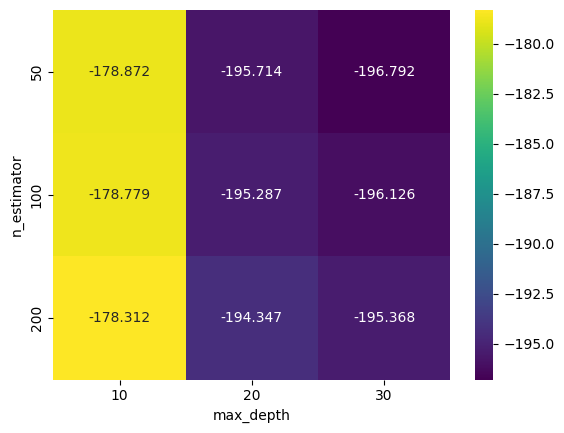

In [ ]:
sns.heatmap(
    pca_rf_age_results.pivot_table(
        index='n_estimator',
        columns='max_depth',
        values='mean_mse',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

### Optimal model visualization

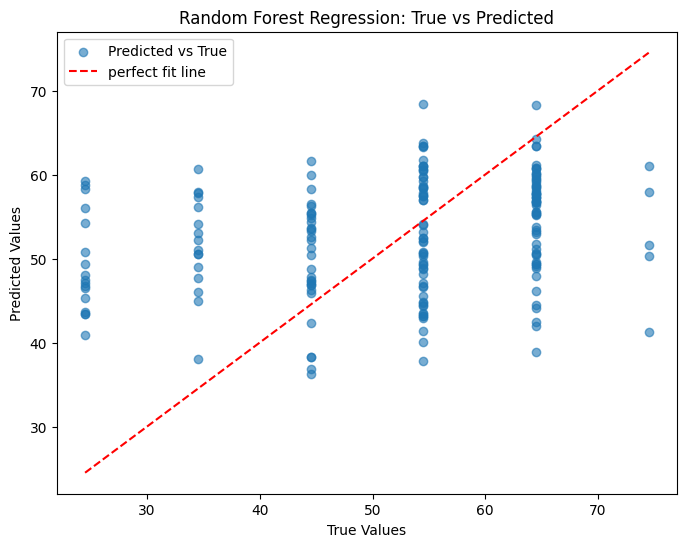

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values[blood_idx,:]
y = target_subsampled['AGE_CONT'].values[blood_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_regressor = RandomForestRegressor(
    random_state=42,
    n_estimators=100,
    max_depth=10,
    )
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="perfect fit line")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: True vs Predicted")
plt.legend()
plt.show()

### Gradient boosting

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values[blood_idx,:]
y = target_subsampled['AGE_CONT'].values[blood_idx]

umap_gb_age_results = hist_gradient_boosting_kfold_cv_regression(X, y, k=5)

In [ ]:
X = pca_result[blood_idx,:]
y = target_subsampled['AGE_CONT'].values[blood_idx]

pca_gb_age_results = hist_gradient_boosting_kfold_cv_regression(X, y, k=5)

<Axes: xlabel='learning_rate', ylabel='max_iter'>

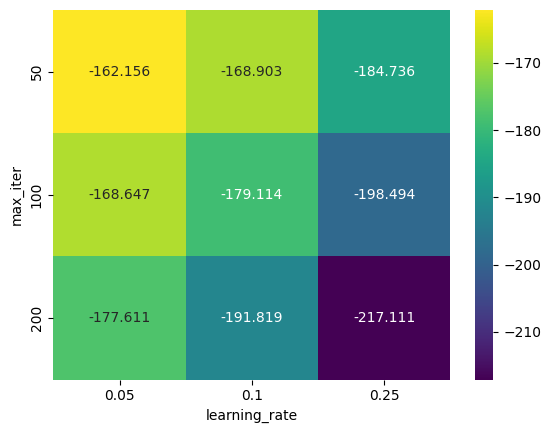

In [ ]:
sns.heatmap(
    umap_gb_age_results.pivot_table(
        index='max_iter',
        columns='learning_rate',
        values='mean_mse',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

<Axes: xlabel='learning_rate', ylabel='max_iter'>

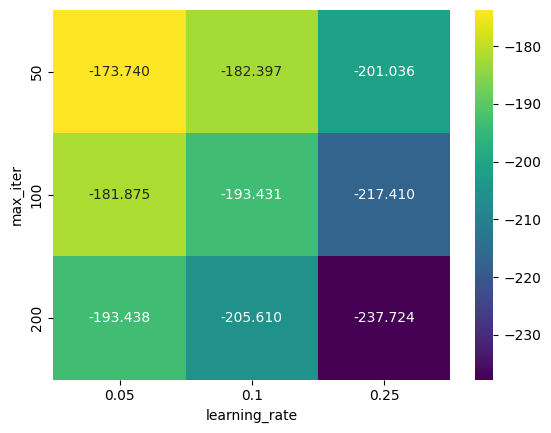

In [ ]:
sns.heatmap(
    pca_gb_age_results.pivot_table(
        index='max_iter',
        columns='learning_rate',
        values='mean_mse',
        aggfunc='mean'
    )
    , annot=True, cmap="viridis", fmt=".3f")

### Optimal model visualization

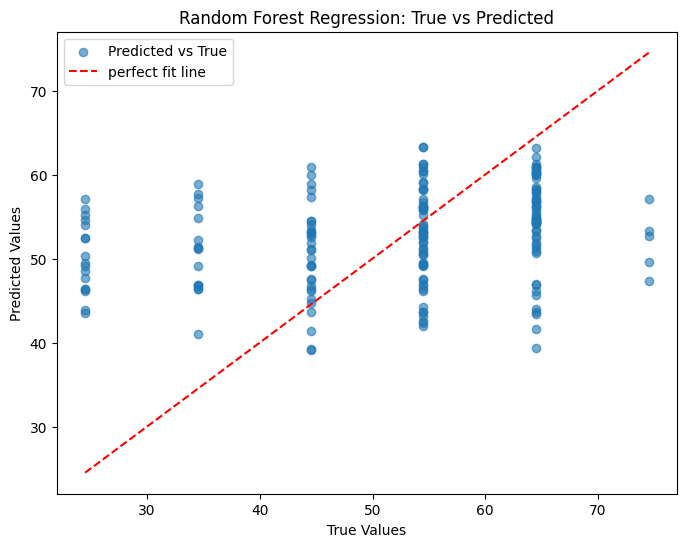

In [ ]:
X = umaps[(30, 0.1)].loc[:, ['UMAP1', 'UMAP2']].values[blood_idx,:]
y = target_subsampled['AGE_CONT'].values[blood_idx]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

hgb_regressor = HistGradientBoostingRegressor(
    random_state=42,
    max_iter=50,
    learning_rate=0.05,
    )
hgb_regressor.fit(X_train, y_train)
y_pred = hgb_regressor.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicted vs True")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="perfect fit line")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: True vs Predicted")
plt.legend()
plt.show()